# Damped and Driven Harmonic Oscillator

A simple harmonic oscillator is described by the equation of motion:
\begin{equation}
\ddot{x} = - \omega_0^2 \, x
\end{equation}
where $\omega_0$ is the natural frequency of the oscillator. For example, a mass attached to a spring has $\omega_0^2 = k/m$, whereas a simple pendulum has $\omega_0^2 = g/l$. The solution to the equation is a sinusoidal function of time:
\begin{equation}
x(t) = A \cos(\omega_0 t + \theta_0)
\end{equation}
where $A$ is the amplitude of the oscillation and $\theta_0$ is the initial phase.

## Damped harmonic oscillator

Now consider a *damped* harmonic oscillator, which is subject to a damping force that is proportional to the velocity. The equation of motion becomes:
\begin{equation}
\ddot{x} = - \omega_0^2 \, x - \gamma \, \dot{x}
\end{equation}
This equation can be solved by using the ansatz $x \sim \mathrm{e}^{i \omega t}$, with the understanding that $x$ is the real part of the solution. Plugging that into the differential equation leads to an algebraic equation for $\omega$:
\begin{equation}
\omega^2 - i \gamma \omega - \omega_0^2 = 0
\end{equation}
The solutions are:
\begin{equation}
\omega = i \frac{\gamma}{2} \pm \sqrt{\omega_0^2 - \frac{\gamma^2}{4}}
\end{equation}

- For weak damping ($\gamma < 2 \omega_0$), the square-root is real, and let us denote it by $\omega_1 \equiv \sqrt{\omega_0^2 - \gamma^2 /4}$. Then the solution looks like:
\begin{equation}
x \sim \mathrm{e}^{i \omega t} = \mathrm{e}^{-(\gamma/2)\, t} \, \mathrm{e}^{i \omega_1 t}
\end{equation}
This describes an oscillation with frequency $\omega_1$ and an amplitude that decays with time.

- For strong damping ($\gamma > 2 \omega_0$), the square-root becomes imaginary, so we can write $\omega = i \Big( \frac{\gamma}{2} \pm \sqrt{\frac{\gamma^2}{4} - \omega_0^2} \Big) \equiv i \lambda_\pm$. Then the solution will behave like:
\begin{equation}
x \sim A \, \mathrm{e}^{-\lambda_+ t} + B \, \mathrm{e}^{-\lambda_- t}
\end{equation}
Both terms are exponentially decaying with time, without any oscillatory motion.

We can numerically solve the equation for the damped harmonic oscillator to verify these behaviors.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as intgr

In [2]:
def damped(X, t, omega0, gamma):
    x, v = X    # unpack variables
    dxdt = v
    dvdt = - omega0**2 * x - gamma * v
    dXdt = [dxdt, dvdt]    # pack derivatives
    return dXdt

Let us first try a small damping strength, in which case we expect the oscillation to decay in time.

In [3]:
# set parameters
omega0 = 1    # can always set this to 1 by rescaling time
gamma = 0.2

# specify initial values
x0 = 1
v0 = 0

time = np.arange(0, 50, 0.1)    # time points to evaluate solutions at
sol = intgr.odeint(damped, [x0, v0], time, args=(omega0, gamma))
xt = sol[:,0]    # x(t) is the first component

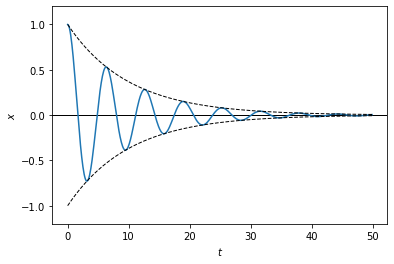

In [4]:
plt.figure()
plt.axhline(0, lw=1, color='k')
plt.plot(time, xt)
plt.plot(time, np.exp(-gamma/2*time), 'k--', lw=1)    # expected amplitude that decays with time
plt.plot(time, -np.exp(-gamma/2*time), 'k--', lw=1)    # expected amplitude that decays with time
plt.ylim(-1.2, 1.2)
plt.xlabel(r'$t$')
plt.ylabel(r'$x$')
plt.show()

The dashed lines show the analytic expression for the decaying amplitude. It matches well with the numerical solution.

Let us now try a wide range of damping strengths, including below and above the threshold $\gamma = 2 \omega_0$.

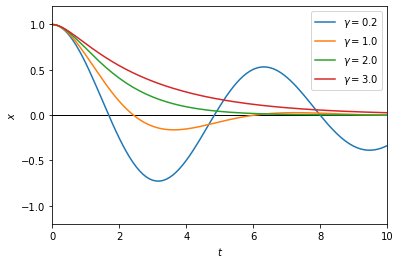

In [5]:
gamma_list = [0.2, 1.0, 2.0, 3.0]

plt.figure()
plt.axhline(0, lw=1, color='k')
for gamma in gamma_list:
    sol = intgr.odeint(damped, [x0, v0], time, args=(omega0, gamma))
    xt = sol[:,0]
    plt.plot(time, xt, label=f'$\gamma={gamma}$')
plt.xlim(0, 10)
plt.ylim(-1.2, 1.2)
plt.xlabel(r'$t$')
plt.ylabel(r'$x$')
plt.legend()
plt.show()

As can be seen from the plot, once $\gamma$ is equal to or larger than the threshold, the solution no longer oscillates, but decays monotonically instead.

## Driven harmonic oscillator (with damping)

We have seen that the damped harmonic oscillator will stop moving eventually. That is because the energy of the system is being dissipated by the damping force. In order to sustain motion, we need to pump energy into the system.

Consider a damped harmonic oscillator that is *driven* by an external force. We will consider a sinusoidal force, such that the equation of motion is given by:
\begin{equation}
\ddot{x} + \gamma \, \dot{x} + \omega_0^2 \, x = \xi \, \cos(\omega t)
\end{equation}
Here $\xi$ and $\omega$ are the amplitude and frequency of the driving force.

To solve this equation, we may again use the ansatz $x \sim \mathrm{e}^{i \omega t}$. However, this time we will assume that the oscillation frequency is the same as the driving force, $\omega$. Intuitively, the damped motion we saw above will vanish after a transient period of time, and only the mode driven by the external force will remain. To proceed analytically, we will also include an amplitude in the ansatz, so that $x = \tilde{A} \, \mathrm{e}^{i \omega t}$. Note that $\tilde{A}$ can be a complex number, with the understanding that the solution will be the real part of the whole expression. Similarly, we will modify the equation by replacing the driving term with $\xi \, \mathrm{e}^{i \omega t}$, so that the original equation is the real part of the modified equation:
\begin{equation}
\ddot{x} + \gamma \, \dot{x} + \omega_0^2 \, x = \xi \, \mathrm{e}^{i \omega t}
\end{equation}
Inserting the ansatz into the equation yields:
\begin{equation}
\big( (-\omega^2 + i \gamma \omega + \omega_0^2) \tilde{A} - \xi \big) \, \mathrm{e}^{i \omega t} = 0
\end{equation}
Solving for $\tilde{A}$ gives:
\begin{equation}
\tilde{A} = \frac{\xi}{\omega_0^2 - \omega^2 + i \gamma \omega}
\end{equation}

We are interested in the amplitude of the driven motion. Write $\tilde{A}$ in the polar form $\tilde{A} = A \, \mathrm{e}^{i \theta_0}$, then we have:
\begin{equation}
x = A \, \mathrm{e}^{i (\omega t + \theta_0)}
\end{equation}
which is exactly the form of a harmonic oscillation with an amplitude
\begin{equation}
A = \big| \tilde{A} \big| = \bigg( \frac{\xi^2}{(\omega_0^2 - \omega^2)^2 + \gamma^2 \omega^2} \bigg)^{\frac12}
\end{equation}
and a phase shift
\begin{equation}
\theta_0 = \arg \big(\tilde{A} \big) = - \arctan \bigg( \frac{\gamma \omega}{\omega_0^2 - \omega^2} \bigg)
\end{equation}
As we will see below, this amplitude depends on how close the driving frequency $\omega$ is to the natural frequency $\omega_0$ of the oscillator. Note that, even when these frequencies are very different, the system is still forced to oscillate at the *driving* frequency, not its natural frequency.

Let us now solve the equation numerically to see how the system settles into the synchronous motion with the driving force.

In [6]:
def driven(X, t, omega0, gamma, xi, omega):
    x, v = X    # unpack variables
    dxdt = v
    dvdt = - omega0**2 * x - gamma * v + xi * np.cos(omega*t)
    dXdt = [dxdt, dvdt]    # pack derivatives
    return dXdt

In [7]:
# set parameters
omega0 = 1
gamma = 0.2
xi = 1
omega = 1.5

# specify initial values
x0 = 1
v0 = 0

time = np.arange(0, 50, 0.1)    # time points to evaluate solutions at
sol = intgr.odeint(driven, [x0, v0], time, args=(omega0, gamma, xi, omega))
xt = sol[:,0]    # x(t) is the first component

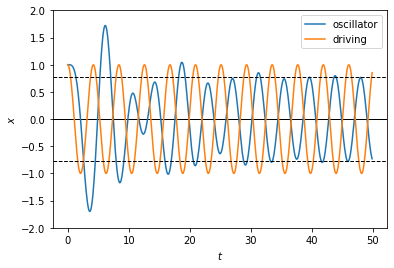

In [8]:
amp = xi / np.sqrt((omega0**2 - omega**2)**2 + gamma**2 * omega**2)    # theoretical amplitude

plt.figure()
plt.axhline(0, lw=1, color='k')
plt.plot(time, xt, label='oscillator')
plt.plot(time, xi*np.cos(omega*time), label='driving')
plt.axhline(amp, lw=1, ls='--', color='k')
plt.axhline(-amp, lw=1, ls='--', color='k')
plt.ylim(-2, 2)
plt.xlabel(r'$t$')
plt.ylabel(r'$x$')
plt.legend()
plt.show()

We can see that there is a transient period, which has to do with the vanishing of the homogeneous solution due to damping alone. After that, the solution settles to oscillating with the driving frequency. Notice that there is a phase shift from the driving force, and the amplitude of the driven oscillation matches our analytical result.

Importantly, the amplitude varies with the frequency of the driving force. Here is a plot of the analytical result.

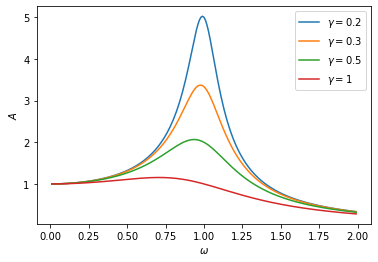

In [9]:
gamma_list = [0.2, 0.3, 0.5, 1]
omega_list = np.arange(0.01, 2, 0.01)

plt.figure()
for gamma in gamma_list:
    amp_list = xi / np.sqrt((omega0**2 - omega_list**2)**2 + gamma**2 * omega_list**2)
    plt.plot(omega_list, amp_list, label=f'$\gamma={gamma}$')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$A$')
plt.legend()
plt.show()

One can see that, for $\gamma \ll \omega_0$, the amplitude peaks around the natural frequency of the harmonic oscillator, $\omega_0$ (set to 1). Near this frequency, the oscillator can be driven to a large amplitude by just a small driving force, which is known as the phenomenon of "resonance". As the driving frequency deviates from the natural frequency, the amplitude drops rapidly, and the width of the peak is roughly given by the damping coefficient, $\gamma$. For larger $\gamma$, the peak widens and the maximum amplitude also decreases, until there is no visible peak when $\gamma > \omega_0$.

```{admonition} Exercise
:class: tip

**Driven harmonic oscillator without damping**

Without the damping term, the equation of a driven harmonic oscillator becomes:
\begin{equation}
\ddot{x} + \omega_0^2 \, x = \xi \, \cos(\omega t)
\end{equation}
Use the ansatz $x = A \mathrm{e}^{i \omega t}$ to solve the equation and obtain an expression for the amplitude $A$. Then solve the equation numerically and compare the solution to the ansatz. Do they match? If not, what is missing?
```

```{admonition} Hint
:class: note, dropdown

The ansatz gives the special solution to the ODE. You need to also include the general solution to the homogeneous equation.
```